In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:
df_bp = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_bp.xlsx')
df_nup = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_nup.xlsx')

In [52]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.86,2030.00,738.74,30.00,22.27,100.00,210.00,70.00,3000.00,220.00,0,4.00,57.00
1,1.86,2030.00,738.74,50.00,23.75,284.62,210.00,70.00,3000.00,220.00,0,4.00,60.00
2,1.86,2030.00,738.74,49.90,33.00,284.62,210.00,70.00,3000.00,220.00,0,4.00,70.00
3,1.86,2030.00,738.74,129.00,21.25,300.00,210.00,70.00,3000.00,220.00,0,5.00,47.00
4,2.77,2030.00,753.00,111.86,22.27,284.62,210.00,70.00,3000.00,220.00,0,5.00,57.00


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [54]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00,1023.00
mean,2.90,1975.70,739.90,110.60,22.20,285.90,482.70,73.30,2466.90,218.40,44.30,6.90,57.20
std,0.90,73.70,330.20,28.30,2.40,40.90,281.30,3.10,485.60,59.70,45.00,2.60,12.40
min,0.40,1731.80,2.40,17.70,14.30,100.00,0.60,64.10,1036.90,33.80,0.00,0.00,0.00
25%,2.30,1924.20,500.00,92.40,20.60,259.10,266.80,71.20,2135.90,179.60,0.00,5.10,49.80
50%,2.90,1977.60,739.70,110.60,22.20,285.90,451.90,73.30,2459.50,219.20,0.00,6.90,57.30
75%,3.60,2021.40,961.80,129.70,24.00,313.00,693.20,75.40,2767.20,257.50,90.00,8.60,64.90
max,5.60,2207.80,1911.50,199.00,33.00,413.30,1399.50,82.70,3848.40,414.60,90.00,14.40,104.00


### Рассматривается модуль упругости при растяжении

1 Переименование целевой переменной

In [55]:
df['y_3'] = df['Соотношение матрица-наполнитель']
df = df.drop(columns=['Соотношение матрица-наполнитель'])

In [56]:
# Кодирование угла нашивки
# df.loc[df["Угол нашивки, град"] == 90, "Угол нашивки, град"] = 1

In [57]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
cols = [col for col in df.columns if col != 'y_W']
df[cols] = sc.fit_transform(df[cols])

main_y = df.loc[:22, 'y_3']
other_y = df.loc[23:, 'y_3']
selected_rows = pd.DataFrame(columns=df.columns)

for y in main_y:
    distances = euclidean_distances(df.iloc[23:], df.iloc[:23].loc[df['y_3'] == y])
    indices = np.argsort(distances, axis=0)[:3]
    selected_rows = selected_rows.append(df.iloc[indices.flatten() + 23])
    
df = pd.concat([df.loc[:22], selected_rows]).drop_duplicates()

# selected_rows = []

# for x in range(23):
#     distances = euclidean_distances(df.iloc[x:x+1, :], df.iloc[23:, :]).flatten()
#     selected_rows.extend(list(distances.argsort()[:3] + 23))

# df = df.loc[list(range(23)) + selected_rows].drop_duplicates()

df[cols] = sc.inverse_transform(df[cols])

print(df.shape)
df.sort_index()

(76, 13)


,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,y_3
0,2030.00,738.74,30.00,22.27,100.00,210.00,70.00,3000.00,220.00,0.00,4.00,57.00,1.86
1,2030.00,738.74,50.00,23.75,284.62,210.00,70.00,3000.00,220.00,0.00,4.00,60.00,1.86
2,2030.00,738.74,49.90,33.00,284.62,210.00,70.00,3000.00,220.00,0.00,4.00,70.00,1.86
3,2030.00,738.74,129.00,21.25,300.00,210.00,70.00,3000.00,220.00,0.00,5.00,47.00,1.86
4,2030.00,753.00,111.86,22.27,284.62,210.00,70.00,3000.00,220.00,0.00,5.00,57.00,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2029.30,993.86,74.69,27.29,226.56,547.52,71.68,2528.08,220.73,90.00,0.04,59.16,2.81
964,1993.54,402.03,131.53,25.28,338.46,819.96,74.98,2120.97,311.07,90.00,7.41,50.57,2.70
991,1992.64,661.57,114.16,23.09,273.54,833.69,73.62,2518.31,187.67,90.00,3.61,46.01,1.95
1004,2038.29,767.90,83.19,25.63,249.61,774.58,71.28,2768.84,266.96,90.00,2.75,63.68,1.58


2 Удаление выбросов

In [58]:
# clfout = IsolationForest(n_estimators=200, max_samples = 'auto', random_state = 1)    # contamination=float(0.1), 
# clfout.fit(df)
# df['anomaly'] = clfout.predict(df)
# df = df[df.anomaly == 1]
# df = df.drop(columns = 'anomaly')

# cols = df.columns
# for col in cols:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df.shape)

(76, 13)


3 EDA

3.1 Визуализация данных

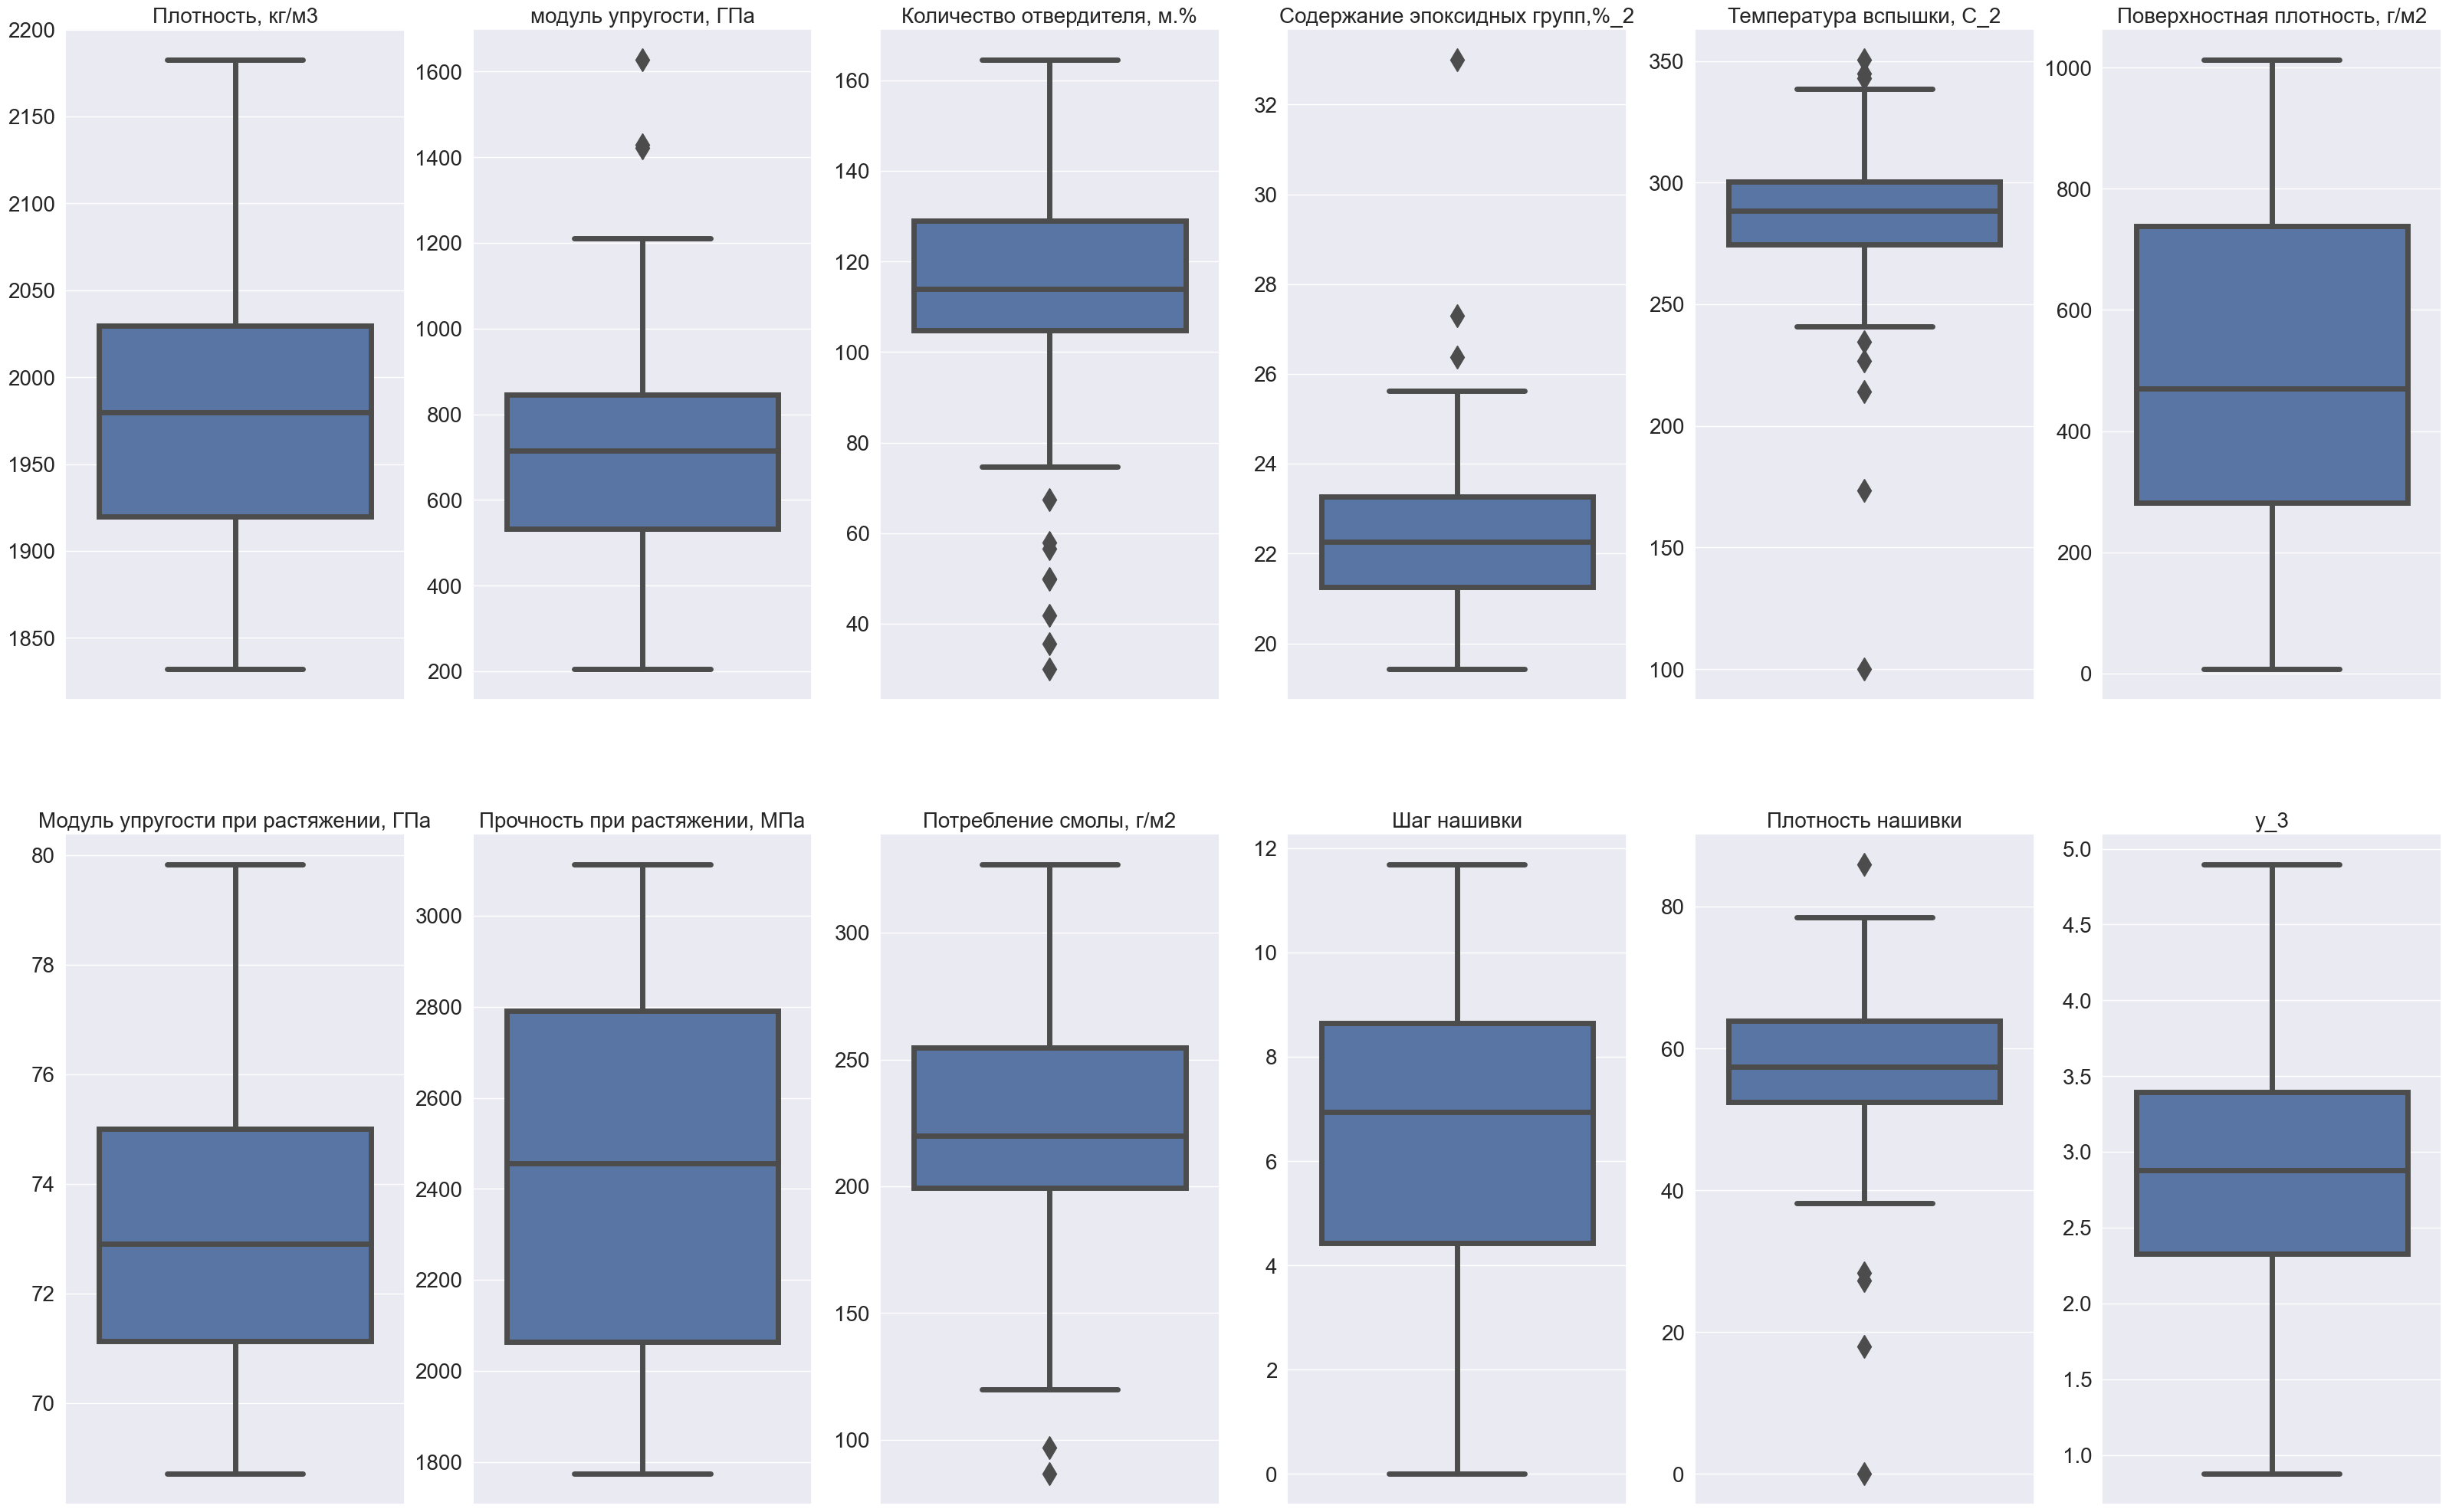

In [59]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [60]:
# sns.pairplot(df, kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [61]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_3', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

In [62]:
# sns.pairplot(df.drop('Угол нашивки, град', axis=1), kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

4 Отбор признаков

In [63]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

    Рассматривается 'Угол нашивки' = 0 и 90

In [64]:
# df = df[df['Угол нашивки, град'] == 0]
# df = df.drop(columns=['Угол нашивки, град'])

4.1 Корреляционные матрицы

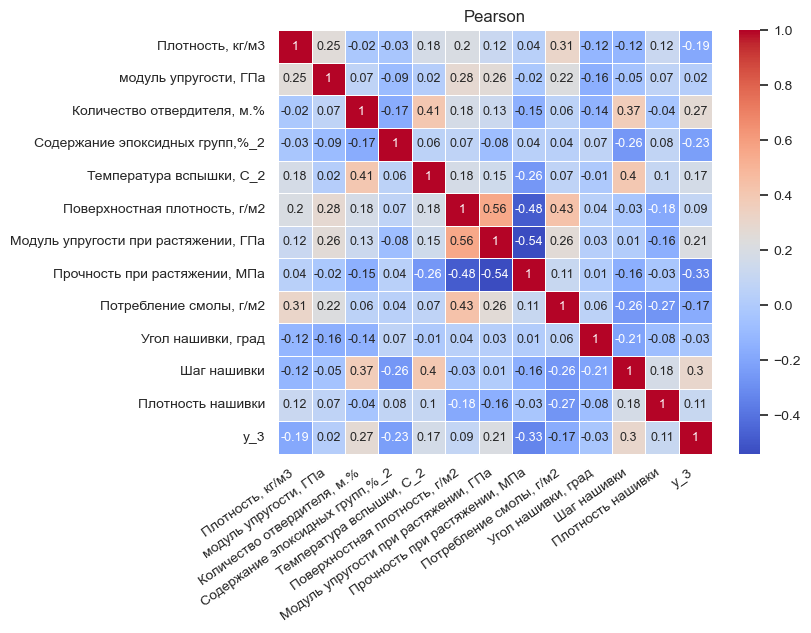

In [65]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

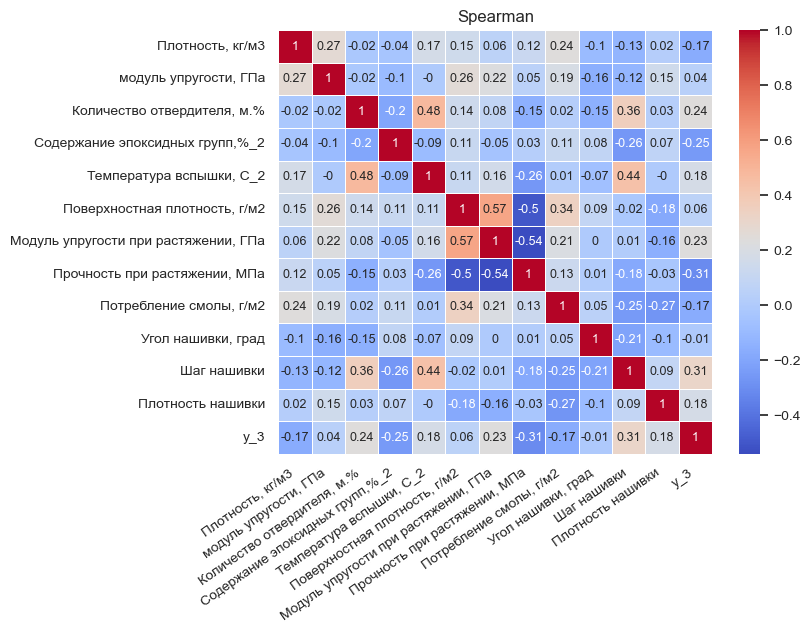

In [66]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [67]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_3'][:-1]
corr_yx_s = corr_matrix_s['y_3'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.265
Прогноз коэф. детерминации R2 Spearman: 0.28


In [68]:
X_3 = df.copy()
y_3 = X_3.pop('y_3')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [69]:
mi_full = mutual_info_regression(X_3, y_3, random_state=2023)
f_full = f_regression(X_3, y_3)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_3.corrwith(y_3), 'f':f_full[0], 'p':f_full[1]}, index=X_3.columns)
f_p_full.round(3)

,MI,corr,f,p
"Плотность, кг/м3",0.04,-0.19,2.89,0.09
"модуль упругости, ГПа",0.16,0.02,0.03,0.87
"Количество отвердителя, м.%",0.15,0.27,5.80,0.02
"Содержание эпоксидных групп,%_2",0.00,-0.23,3.97,0.05
"Температура вспышки, С_2",0.00,0.17,2.27,0.14
"Поверхностная плотность, г/м2",0.19,0.09,0.63,0.43
"Модуль упругости при растяжении, ГПа",0.00,0.21,3.33,0.07
"Прочность при растяжении, МПа",0.13,-0.33,9.15,0.00
"Потребление смолы, г/м2",0.23,-0.17,2.10,0.15
"Угол нашивки, град",0.09,-0.03,0.07,0.79


4.4 Анализ мультиколлинеарности признаков

In [70]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
"Плотность, кг/м3",1.40,0.72
"модуль упругости, ГПа",1.28,0.78
"Количество отвердителя, м.%",1.43,0.70
"Содержание эпоксидных групп,%_2",1.28,0.78
"Температура вспышки, С_2",1.65,0.61
"Поверхностная плотность, г/м2",2.19,0.46
"Модуль упругости при растяжении, ГПа",1.89,0.53
"Прочность при растяжении, МПа",2.09,0.48
"Потребление смолы, г/м2",1.73,0.58
"Угол нашивки, град",1.14,0.88


4.5 Пошаговый отбор признаков (stepwise regression)

In [71]:
backselect = step_reg.backward_regression(X_3, y_3, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_3, y_3, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Количество отвердителя, м.%', 'Прочность при растяжении, МПа']
['Прочность при растяжении, МПа', 'Шаг нашивки']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [72]:
df = df.loc[:, [x_1, x_3, x_4, x_5, x_7, x_8, x_9, x_11, x_12, 'y_3']]

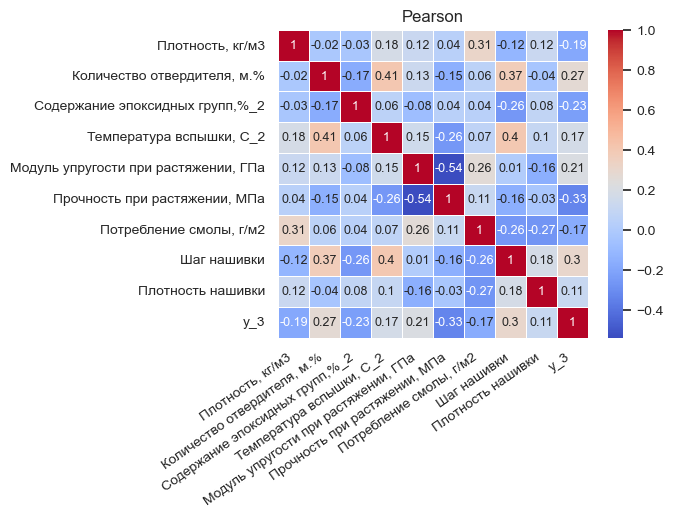

In [73]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [74]:
X_3 = df.drop(['y_3'], axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_3, # X_poly - если использовать полиномиальную регрессию
                                                    y_3,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(53, 9)
(23, 9)


In [76]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

6 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [77]:
df_train = pd.DataFrame(data=X_train_std, columns=X_3.columns)
df_train['y_3'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_3.columns)
df_test['y_3'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_3'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_3'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Оценка R2 для full-выборки:  0.265
Оценка R2 для train-выборки: 0.242
Оценка R2 для test-выборки:  0.482


#### 7 Обучение моделей

In [78]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_std, X_test_std, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 18.39it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.12,0.48,0.63,0.01
ExtraTreeRegressor,-0.19,0.30,0.73,0.01
HuberRegressor,-0.21,0.28,0.74,0.03
LinearSVR,-0.23,0.27,0.75,0.03
SVR,-0.31,0.22,0.77,0.01
LinearRegression,-0.31,0.22,0.77,0.01
TransformedTargetRegressor,-0.31,0.22,0.77,0.01
Lars,-0.31,0.22,0.77,0.03
Ridge,-0.32,0.22,0.77,0.01


In [79]:
metrics = {}

7.1 LinearRegression

In [80]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

y_lr_pred = model_lr.predict(X_test)
y_lr_pred_train = model_lr.predict(X_train)

rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_lr_pred_train)).round(3)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_lr_pred)).round(3)
mae_lr_train = mean_absolute_error(y_train, y_lr_pred_train).round(3)
mae_lr_test = mean_absolute_error(y_test, y_lr_pred).round(3)
r2_lr_train = r2_score(y_train, y_lr_pred_train).round(3)
r2_lr_test = r2_score(y_test, y_lr_pred).round(3)
metrics['LinearRegression'] = (rmse_lr_train, rmse_lr_test, mae_lr_train, mae_lr_test, r2_lr_train, r2_lr_test)

print(f'RMSE train: {rmse_lr_train}')
print(f'RMSE test:  {rmse_lr_test}')
print()
print(f'MAE train:  {mae_lr_train}')
print(f'MAE test:   {mae_lr_test}')
print()
print(f'R2 train:   {r2_lr_train}')
print(f'R2 test:    {r2_lr_test}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(model_lr.coef_[:], index=X_3.columns, columns=['k']).round(5))
print()
print(f'Свободный член регрессии  a0 =  {model_lr.intercept_.round(3)}')

RMSE train: 0.646
RMSE test:  0.773

MAE train:  0.517
MAE test:   0.606

R2 train:   0.242
R2 test:    0.223

Коэффициенты регрессии:
                                         k
Плотность, кг/м3                     -0.14
Количество отвердителя, м.%           0.12
Содержание эпоксидных групп,%_2      -0.13
Температура вспышки, С_2             -0.06
Модуль упругости при растяжении, ГПа  0.06
Прочность при растяжении, МПа        -0.16
Потребление смолы, г/м2              -0.08
Шаг нашивки                           0.03
Плотность нашивки                     0.05

Свободный член регрессии  a0 =  2.814


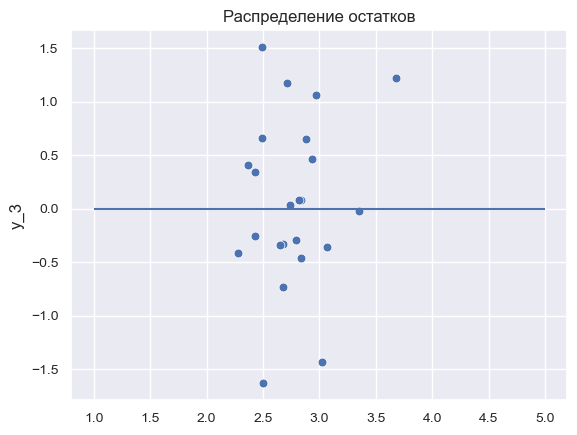

In [81]:
sns.scatterplot(x = y_lr_pred, y = y_test - y_lr_pred, s = 40)
plt.hlines(y = 0, xmin = 1, xmax = 5)
plt.title('Распределение остатков')
plt.show()

7.2 ElasticNet

In [82]:
en = ElasticNet()
en_parameters = {'alpha': (0.01, 0.03, 0.1, 0.3, 1, 3, 10), 
                 'l1_ratio': (0.05, 0.1, 0.3, 0.5, 0.7, 0.9),
                 'random_state':[1, 7, 42, 100]
}
model_en = GridSearchCV(estimator=en,
                   param_grid=en_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_en.fit(X_train_std, y_train)

y_en_pred = model_en.predict(X_test_std)
y_en_pred_train = model_en.predict(X_train_std)

rmse_en_train = np.sqrt(mean_squared_error(y_train, y_en_pred_train)).round(3)
rmse_en_test = np.sqrt(mean_squared_error(y_test, y_en_pred)).round(3)
mae_en_train = mean_absolute_error(y_train, y_en_pred_train).round(3)
mae_en_test = mean_absolute_error(y_test, y_en_pred).round(3)
r2_en_train = r2_score(y_train, y_en_pred_train).round(3)
r2_en_test = r2_score(y_test, y_en_pred).round(3)
metrics['ElasticNet'] = (rmse_en_train, rmse_en_test, mae_en_train, mae_en_test, r2_en_train, r2_en_test)

print(f'RMSE train: {rmse_en_train}')
print(f'RMSE test:  {rmse_en_test}')
print()
print(f'MAE train:  {mae_en_train}')
print(f'MAE test:   {mae_en_test}')
print()
print(f'R2 train:   {r2_en_train}')
print(f'R2 test:    {r2_en_test}')
model_en.best_params_

RMSE train: 0.668
RMSE test:  0.807

MAE train:  0.551
MAE test:   0.634

R2 train:   0.189
R2 test:    0.152


{'alpha': 0.1, 'l1_ratio': 0.5, 'random_state': 1}

7.3 GradientBoostingRegressor

In [83]:
gbr = GradientBoostingRegressor()
gbr_parameters = {
    'n_estimators' : range(100, 600, 100),
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1147, 7, 42, 100]
}
model_gbr = GridSearchCV(estimator=gbr,
                   param_grid=gbr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_gbr.fit(X_train_std, y_train)

y_gbr_pred = model_gbr.predict(X_test_std)
y_gbr_pred_train = model_gbr.predict(X_train_std)

rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_gbr_pred_train)).round(3)
rmse_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_pred)).round(3)
mae_gbr_train = mean_absolute_error(y_train, y_gbr_pred_train).round(3)
mae_gbr_test = mean_absolute_error(y_test, y_gbr_pred).round(3)
r2_gbr_train = r2_score(y_train, y_gbr_pred_train).round(3)
r2_gbr_test = r2_score(y_test, y_gbr_pred).round(3)
metrics['GradientBoosting'] = (rmse_gbr_train, rmse_gbr_test, mae_gbr_train, mae_gbr_test, r2_gbr_train, r2_gbr_test)

print(f'RMSE train: {rmse_gbr_train}')
print(f'RMSE test:  {rmse_gbr_test}')
print()
print(f'MAE train:  {mae_gbr_train}')
print(f'MAE test:   {mae_gbr_test}')
print()
print(f'R2 train:   {r2_gbr_train}')
print(f'R2 test:    {r2_gbr_test}')
model_gbr.best_params_

RMSE train: 0.029
RMSE test:  0.796

MAE train:  0.023
MAE test:   0.626

R2 train:   0.998
R2 test:    0.175


{'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 100}

7.4 RandomForestRegressor

In [84]:
rfr = RandomForestRegressor()
rfr_parameters = {
    'n_estimators' : range(100, 400, 100),
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : range(1, 8),
    'min_samples_leaf' : range(2, 4),
    'min_samples_split' : range(4, 8, 2),
    'random_state':[1, 7, 42, 1147]
}
model_rfr = GridSearchCV(estimator=rfr,
                   param_grid=rfr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_rfr.fit(X_train_std, y_train)

y_rfr_pred = model_rfr.predict(X_test_std)
y_rfr_pred_train = model_rfr.predict(X_train_std)

rmse_rfr_train = np.sqrt(mean_squared_error(y_train, y_rfr_pred_train)).round(3)
rmse_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_pred)).round(3)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train).round(3)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred).round(3)
r2_rfr_train = r2_score(y_train, y_rfr_pred_train).round(3)
r2_rfr_test = r2_score(y_test, y_rfr_pred).round(3)
metrics['RandomForest'] = (rmse_rfr_train, rmse_rfr_test, mae_rfr_train, mae_rfr_test, r2_rfr_train, r2_rfr_test)

print(f'RMSE train: {rmse_rfr_train}')
print(f'RMSE test:  {rmse_rfr_test}')
print()
print(f'MAE train:  {mae_rfr_train}')
print(f'MAE test:   {mae_rfr_test}')
print()
print(f'R2 train:   {r2_rfr_train}')
print(f'R2 test:    {r2_rfr_test}')
model_rfr.best_params_

RMSE train: 0.549
RMSE test:  0.823

MAE train:  0.448
MAE test:   0.643

R2 train:   0.453
R2 test:    0.118


{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 7}

7.5 KNeighborsRegressor

In [85]:
knr = KNeighborsRegressor()
knr_parameters = {'n_neighbors' : range(1, 101, 2), 
          # 'weights' : ['uniform', 'distance'],
          # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
model_knr = GridSearchCV(estimator=knr,
                   param_grid=knr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_knr.fit(X_train_std, y_train)

y_knr_pred = model_knr.predict(X_test_std)
y_knr_pred_train = model_knr.predict(X_train_std)

rmse_knr_train = np.sqrt(mean_squared_error(y_train, y_knr_pred_train)).round(3)
rmse_knr_test = np.sqrt(mean_squared_error(y_test, y_knr_pred)).round(3)
mae_knr_train = mean_absolute_error(y_train, y_knr_pred_train).round(3)
mae_knr_test = mean_absolute_error(y_test, y_knr_pred).round(3)
r2_knr_train = r2_score(y_train, y_knr_pred_train).round(3)
r2_knr_test = r2_score(y_test, y_knr_pred).round(3)
metrics['KNeighbors'] = (rmse_knr_train, rmse_knr_test, mae_knr_train, mae_knr_test, r2_knr_train, r2_knr_test)

print(f'RMSE train: {rmse_knr_train}')
print(f'RMSE test:  {rmse_knr_test}')
print()
print(f'MAE train:  {mae_knr_train}')
print(f'MAE test:   {mae_knr_test}')
print()
print(f'R2 train:   {r2_knr_train}')
print(f'R2 test:    {r2_knr_test}')
model_knr.best_params_

RMSE train: 0.664
RMSE test:  0.766

MAE train:  0.539
MAE test:   0.601

R2 train:   0.199
R2 test:    0.238


{'n_neighbors': 13}

7.6 TheilSenRegressor

In [86]:
tsr = TheilSenRegressor()
tsr_parameters = {
    'random_state':[1, 7, 42, 100]
}
model_tsr = GridSearchCV(estimator=tsr,
                   param_grid=tsr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_tsr.fit(X_train_std, y_train)

y_tsr_pred = model_tsr.predict(X_test_std)
y_tsr_pred_train = model_tsr.predict(X_train_std)

rmse_tsr_train = np.sqrt(mean_squared_error(y_train, y_tsr_pred_train)).round(3)
rmse_tsr_test = np.sqrt(mean_squared_error(y_test, y_tsr_pred)).round(3)
mae_tsr_train = mean_absolute_error(y_train, y_tsr_pred_train).round(3)
mae_tsr_test = mean_absolute_error(y_test, y_tsr_pred).round(3)
r2_tsr_train = r2_score(y_train, y_tsr_pred_train).round(3)
r2_tsr_test = r2_score(y_test, y_tsr_pred).round(3)
metrics['TheilSen'] = (rmse_tsr_train, rmse_tsr_test, mae_tsr_train, mae_tsr_test, r2_tsr_train, r2_tsr_test)

print(f'RMSE train: {rmse_tsr_train}')
print(f'RMSE test:  {rmse_tsr_test}')
print()
print(f'MAE train:  {mae_tsr_train}')
print(f'MAE test:   {mae_tsr_test}')
print()
print(f'R2 train:   {r2_tsr_train}')
print(f'R2 test:    {r2_tsr_test}')
model_tsr.best_params_

RMSE train: 0.685
RMSE test:  0.74

MAE train:  0.522
MAE test:   0.574

R2 train:   0.149
R2 test:    0.287


{'random_state': 100}

8. Сводная таблица метрик моделей

In [87]:
df_metrics = pd.DataFrame(metrics)
df_metrics.index = ['RMSE train', 'RMSE test', 'MAE train', 'MAE test', 'R2 train', 'R2 test']
df_metrics

,LinearRegression,ElasticNet,GradientBoosting,RandomForest,KNeighbors,TheilSen
RMSE train,0.65,0.67,0.03,0.55,0.66,0.69
RMSE test,0.77,0.81,0.80,0.82,0.77,0.74
MAE train,0.52,0.55,0.02,0.45,0.54,0.52
MAE test,0.61,0.63,0.63,0.64,0.60,0.57
R2 train,0.24,0.19,1.00,0.45,0.20,0.15
R2 test,0.22,0.15,0.17,0.12,0.24,0.29


9. Доверительный интервал для предсказаний лучшей модели

In [88]:
y_pred = y_tsr_pred

In [89]:
# Вычисляем доверительный интервал для прогноза
# std, lower, upper = wls_prediction_std(lr, X_test_std, alpha=0.05)
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Задаем уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

# Выводим результаты
y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:8].round(2)}")
print(f"y_test:          {y_test[:8].round(2)}")
print(f"y_pred:          {y_pred[:8].round(2)}")
print(f"Верхняя граница: {upper[:8].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [0.27 0.86 1.14 0.03 0.32 0.26 0.39 0.98]
y_test:          [2.77 2.38 2.92 1.86 2.34 2.5  2.32 3.39]
y_pred:          [2.3  2.89 3.17 2.06 2.35 2.3  2.42 3.01]
Верхняя граница: [4.34 4.93 5.21 4.1  4.39 4.33 4.46 5.05]

Разброс тестовых значений:       0.88; 4.9
Разброс предсказанных значений:  2.06; 3.96

Наименьшая нижняя граница доверительного интервала:  0.03
Набольшая верхняя граница доверительного интервала:  5.99


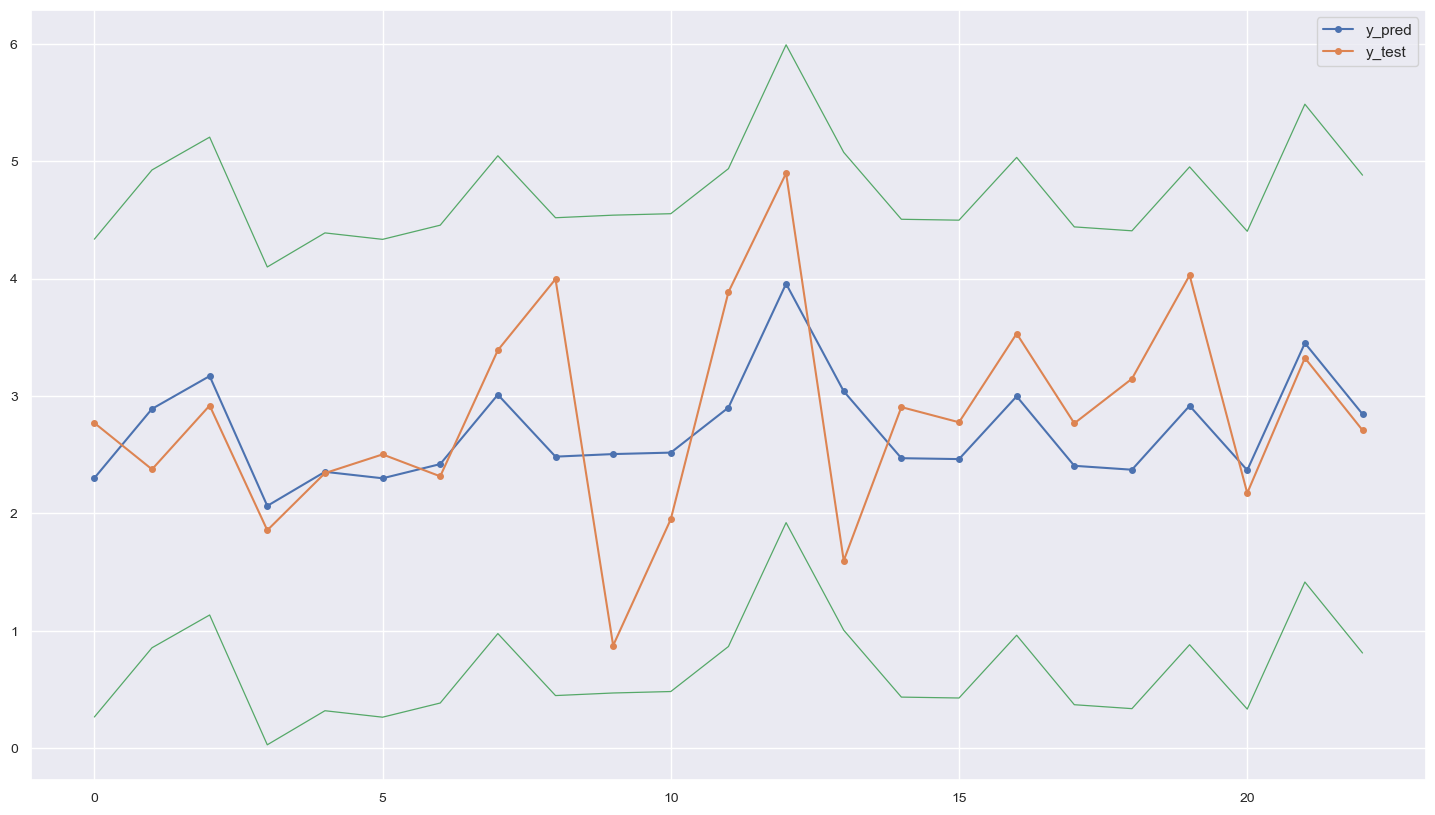

In [90]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()